# Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and I've built a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses.

# Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Fetching the dataset

In [2]:
df = pd.read_csv("C:/Users/Basanth P R/Downloads/train-chennai-sale.csv")
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### DATE_BUILD - DATE_SALE gives us the age of the house. We shall create a column called HOUSE_AGE

In [4]:
df['HOUSE_AGE']=pd.to_datetime(df['DATE_SALE']).apply(lambda x: x.year) - pd.to_datetime(df['DATE_BUILD']).apply(lambda x: x.year)
df = df.drop(columns=['DATE_SALE', 'DATE_BUILD'])

### Finding null values in our dataset

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
HOUSE_AGE         0
dtype: int64

### Imputation

In [6]:
df = df.fillna({'N_BEDROOM':df['N_BEDROOM'].mode()[0],'N_BATHROOM':df['N_BATHROOM'].mode()[0],'QS_OVERALL':df['QS_OVERALL'].median()})
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
HOUSE_AGE        0
dtype: int64

### Checking data types 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7109 non-null   float64
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

### Data wrangling 

### Converting datatypes and dropping unimportant columns

In [8]:
df['N_BEDROOM']= df['N_BEDROOM'].astype(int)
df['N_BATHROOM']= df['N_BATHROOM'].astype(int)
df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int32  
 4   N_BATHROOM     7109 non-null   int32  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  HOUSE_AGE      7109 non-null   int64  
dtypes: float

### AREA

In [10]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [11]:
df.replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)

In [12]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

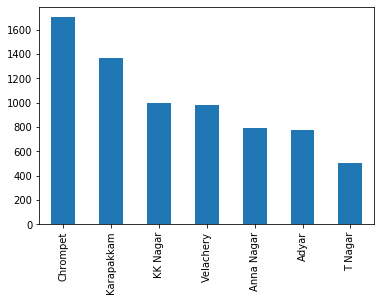

In [13]:
df.AREA.value_counts().plot(kind='bar')

*Chrompet area has maximum number of houses*

###  INT_SQFT

In [14]:
df.INT_SQFT.value_counts()

1781    18
1538    15
1505    13
1514    13
786     12
        ..
2467     1
2455     1
1516     1
2427     1
2087     1
Name: INT_SQFT, Length: 1699, dtype: int64

In [15]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

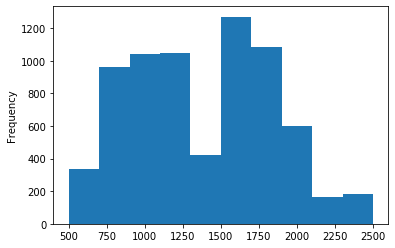

In [16]:
df.INT_SQFT.plot(kind='hist')

*People's expectations in SQFT are preferably falling under 2 sections i.e between(750-1250) & (1500-2000)*

### DIST_MAINROAD

In [17]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

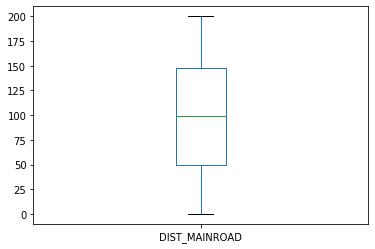

In [18]:
df.DIST_MAINROAD.plot(kind='box')

### N_BEDROOM 

In [19]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

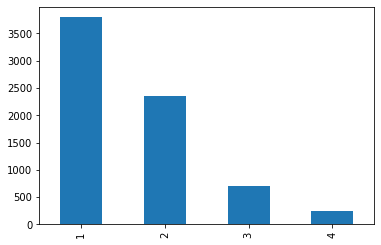

In [20]:
df.N_BEDROOM.value_counts().plot(kind = 'bar')

*Most of the houses are having a single bedroom*

### N_BATHROOM

In [21]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

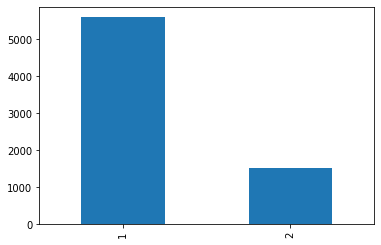

In [22]:
df.N_BATHROOM.value_counts().plot(kind='bar')

*Majority of the houses are having a single bathroom*

### N_ROOM

In [23]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

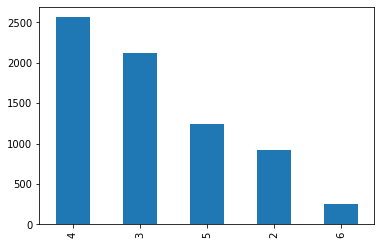

In [24]:
df.N_ROOM.value_counts().plot(kind='bar')

*Houses with 4 bedrooms are dominating amongst the other values*

### SALE_COND

In [25]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [26]:
df.replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace=True)

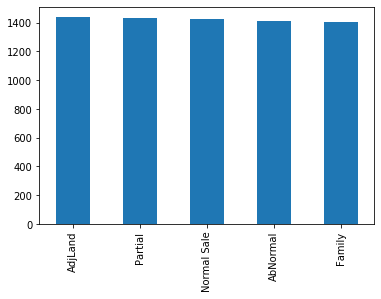

In [27]:
df.SALE_COND.value_counts().plot(kind='bar')

*We don't see much relativity here*

### PARK_FACIL

In [28]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [29]:
df.replace({'Noo':'No'},inplace=True)

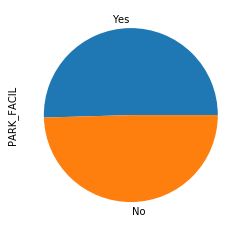

In [30]:
df.PARK_FACIL.value_counts().plot(kind='pie')

*Parking facility is equally distributed*

### BUILDTYPE

In [31]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [32]:
df.replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

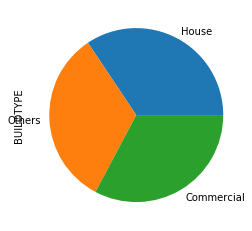

In [33]:
df.BUILDTYPE.value_counts().plot(kind='pie')

*We don't see much relativity here as they're equally distributed*

### UTILITY_AVAIL

In [34]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [35]:
df.replace({'All Pub':'AllPub'},inplace=True)

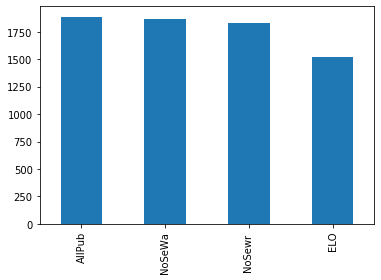

In [36]:
df.UTILITY_AVAIL.value_counts().plot(kind='bar')

### STREET

In [37]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [38]:
df.replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [39]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

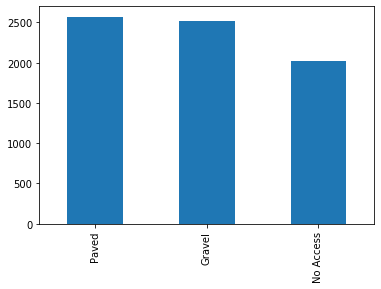

In [40]:
df.STREET.value_counts().plot(kind='bar')

*Paved & Gravel are majorly present*

### MZZONE

In [41]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

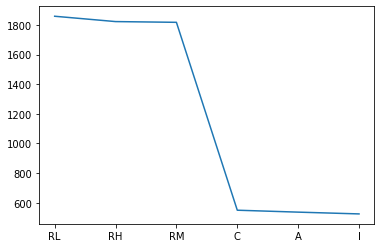

In [42]:
df.MZZONE.value_counts().plot(kind='line')

### QS_ROOMS

In [43]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

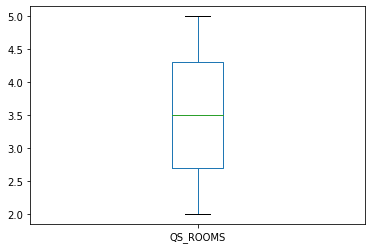

In [44]:
df.QS_ROOMS.plot(kind='box')

### QS_BATHROOM

In [45]:
df.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

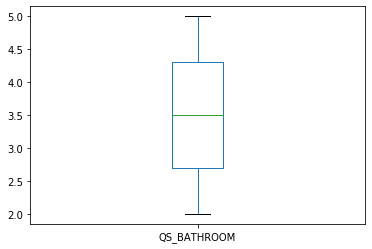

In [46]:
df.QS_BATHROOM.plot(kind='box')

### QS_BEDROOM

In [47]:
df.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

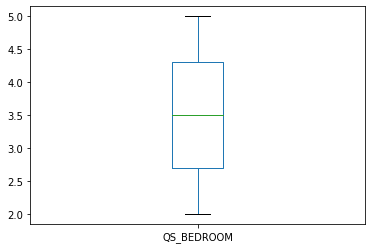

In [48]:
df.QS_BEDROOM.plot(kind='box')

### QS_OVERALL

In [49]:
df.QS_OVERALL.describe()

count    7109.000000
mean        3.503232
std         0.525440
min         2.000000
25%         3.130000
50%         3.500000
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

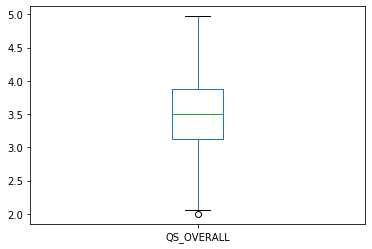

In [50]:
df.QS_OVERALL.plot(kind='box')

### SALES_PRICE

In [51]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

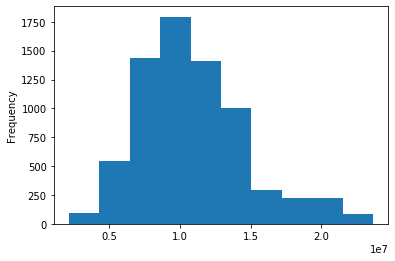

In [52]:
df.SALES_PRICE.plot(kind='hist')

### HOUSE_AGE

In [53]:
df.HOUSE_AGE.describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: HOUSE_AGE, dtype: float64

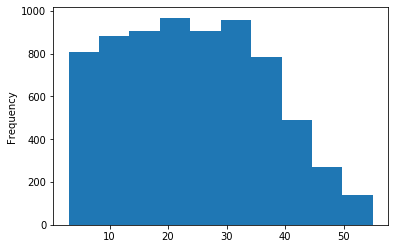

In [54]:
df.HOUSE_AGE.plot(kind='hist')

In [55]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330987
N_BATHROOM       0.108834
QS_ROOMS         0.021967
QS_OVERALL       0.020474
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
HOUSE_AGE       -0.118842
Name: SALES_PRICE, dtype: float64

### Visualization 

#### We are comparing feature and target variable in order to know the relativity

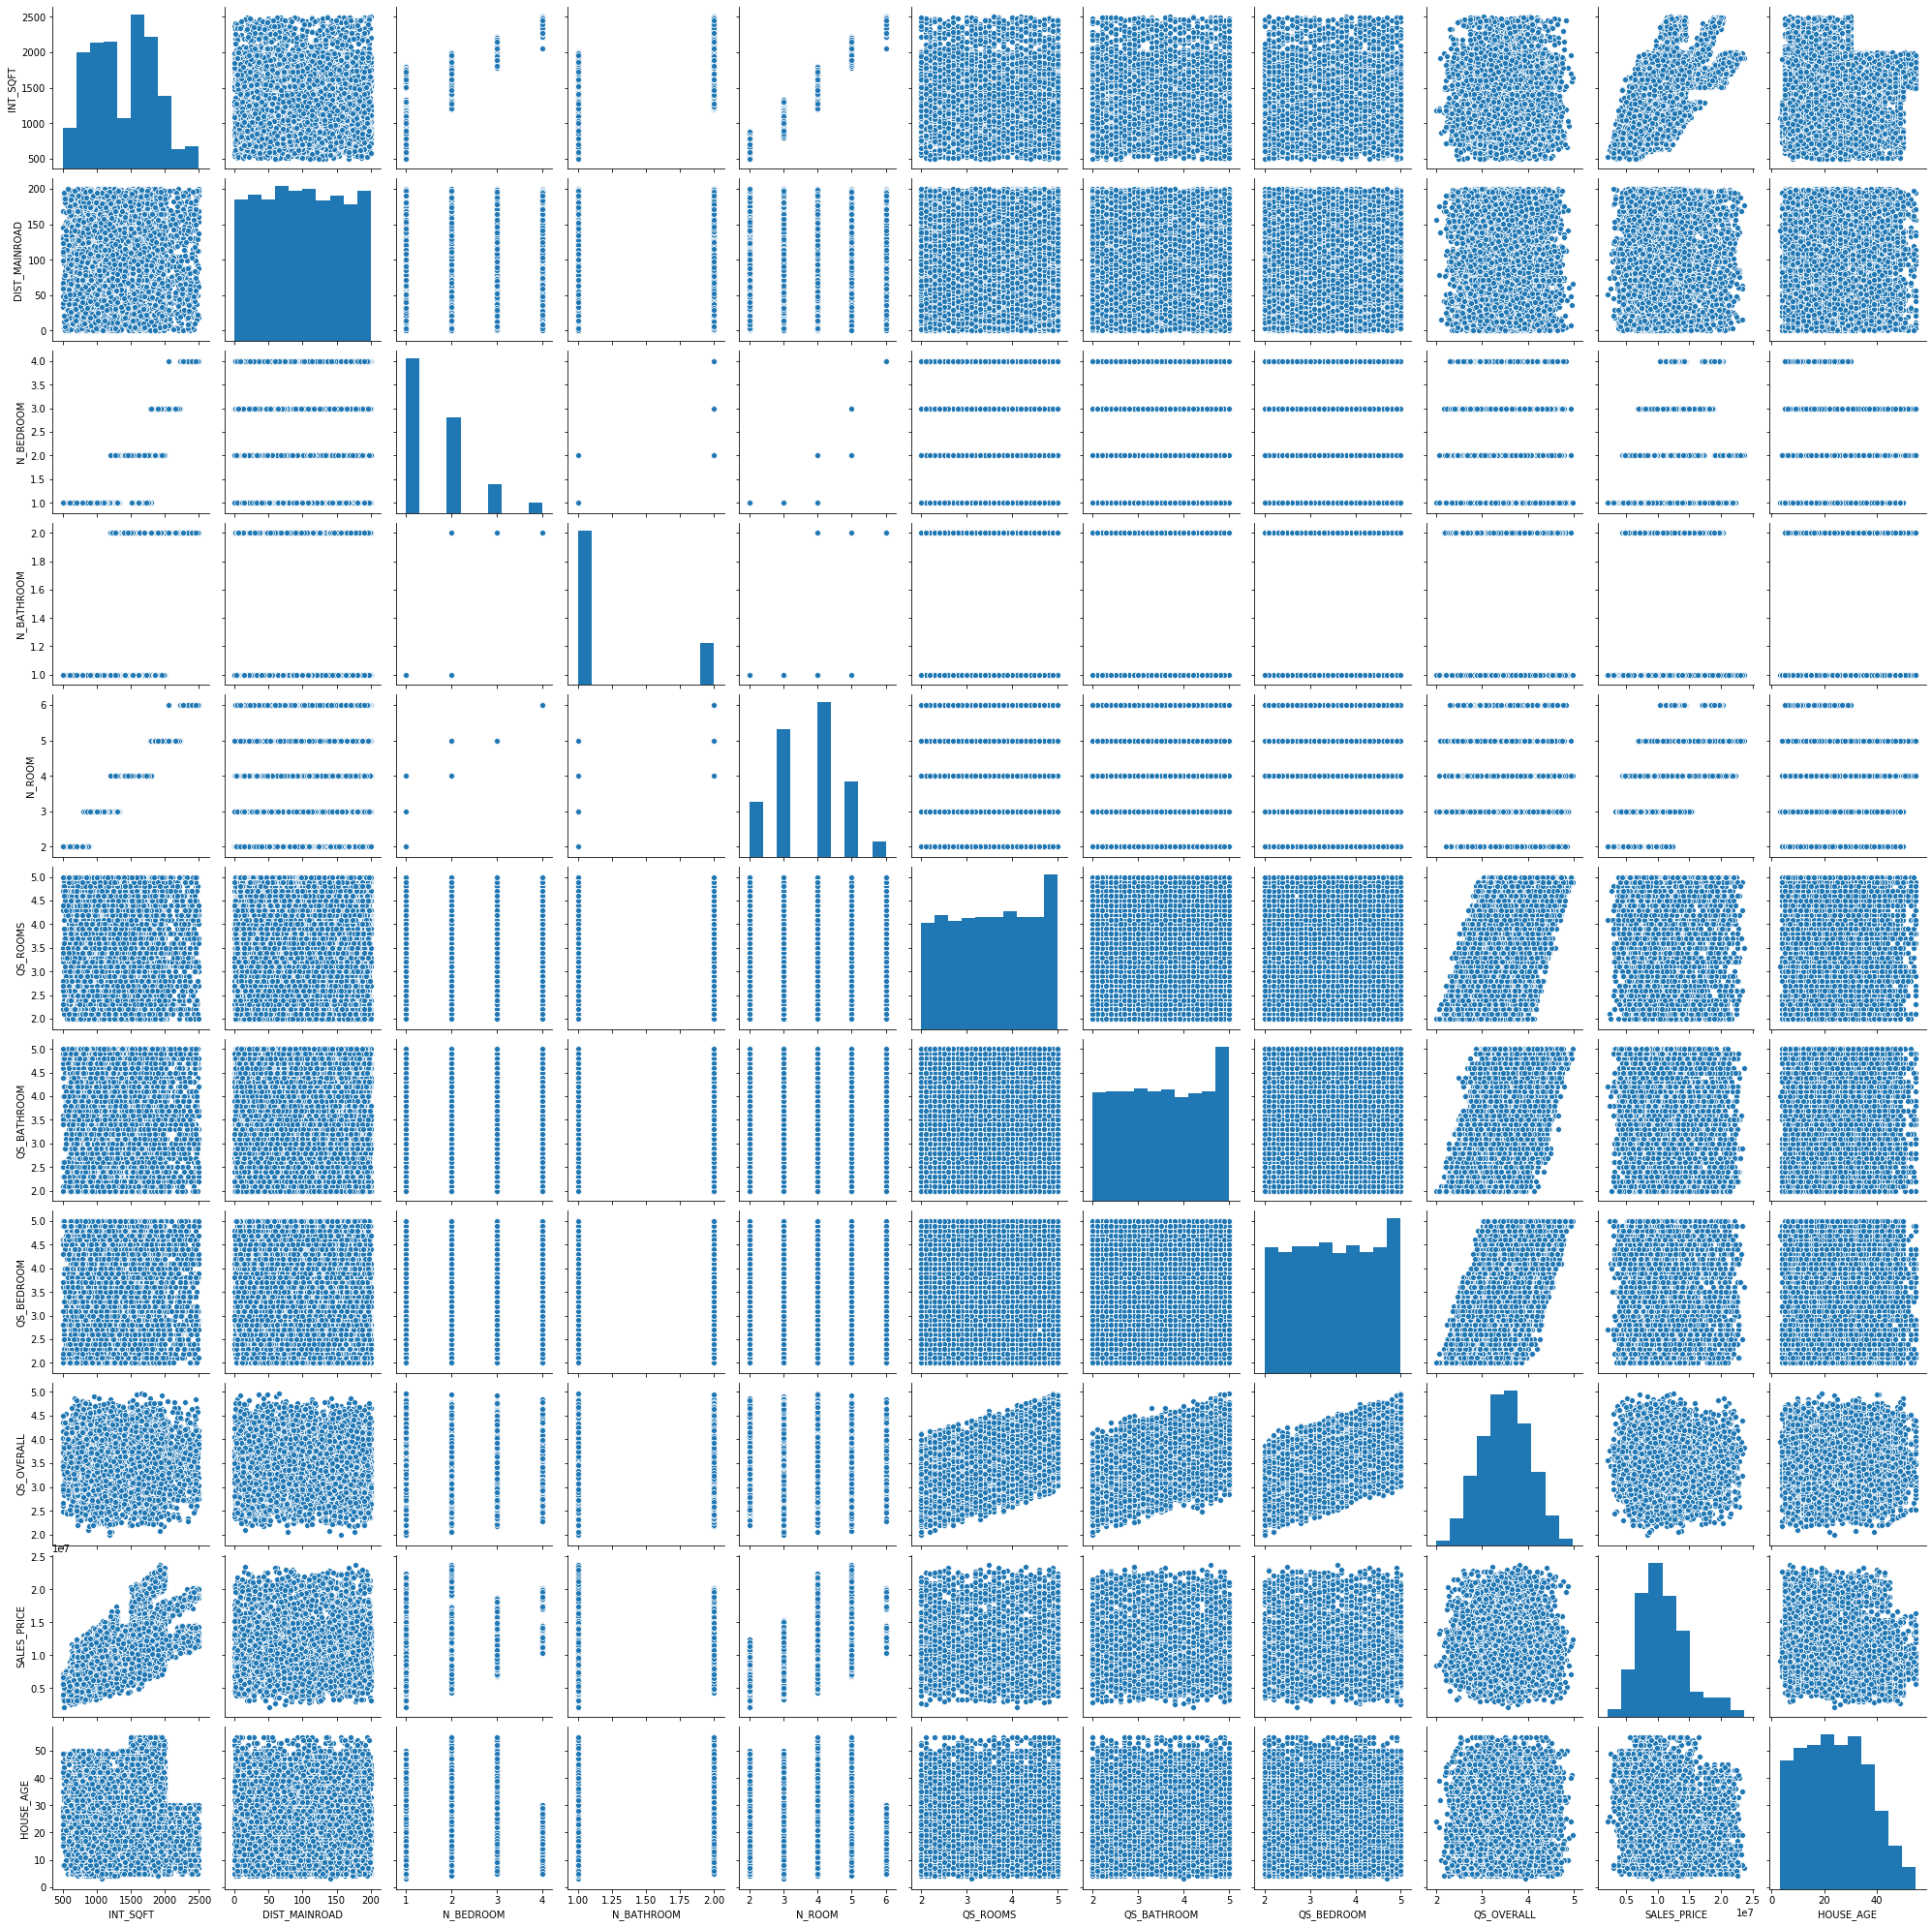

In [56]:
sns.pairplot(df)

### AREA

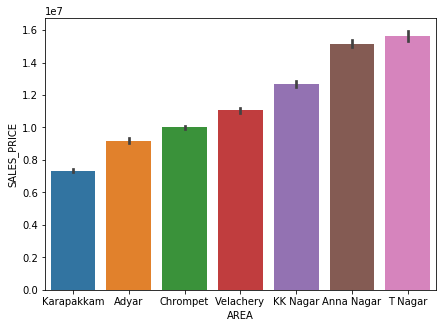

In [57]:
area=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='SALES_PRICE', data=df,order=area)
plt.show()

*We can see that the houses are of higher price in T Nagar, Anna Nagar & KK Nagar*

### INT_SQFT 

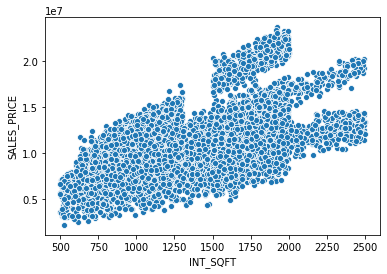

In [58]:
sns.scatterplot(x=df.INT_SQFT,y =df.SALES_PRICE)

*There's a positive linear reationship between SQFT & sales price*

### DIST_MAINROAD

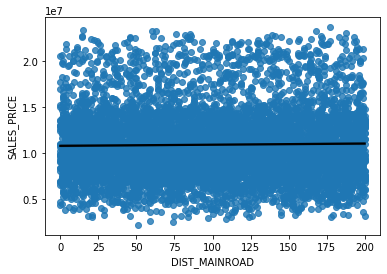

In [59]:
sns.regplot(x=df.DIST_MAINROAD ,y = df.SALES_PRICE, line_kws={"color": "black"})

*We don't see any relationship here*

### N_BEDROOM

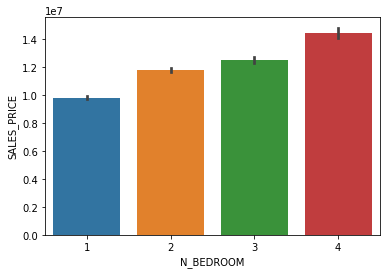

In [60]:
sns.barplot(x = df.N_BEDROOM, y = df.SALES_PRICE)

*Number of bedrooms is directly proportional to sales price*

### N_BATHROOM

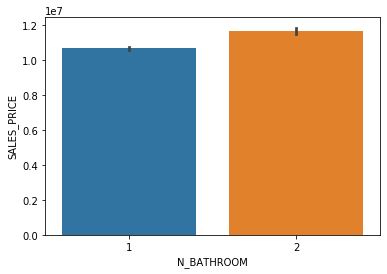

In [61]:
sns.barplot(x = df.N_BATHROOM, y = df.SALES_PRICE)

*There's slight increase in price for a 2 Bathroom house*

### N_ROOM

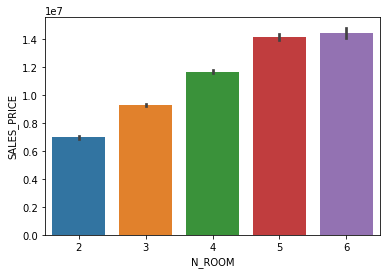

In [62]:
sns.barplot(x = df.N_ROOM, y = df.SALES_PRICE)

*Number of rooms is also playing a crucial role in defining price of the house as it's increasing the selling price*

### SALE_COND

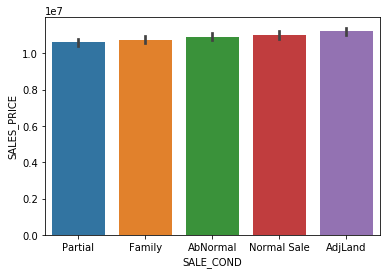

In [63]:
order0 = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x = df.SALE_COND, y = df.SALES_PRICE, order=order0)

*Sale condition is slightly related to sale price*

### PARK_FACIL

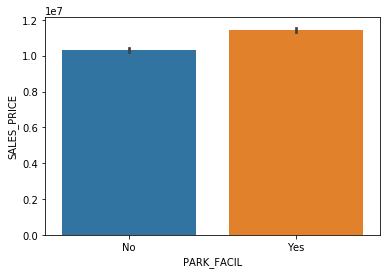

In [64]:
order01 = df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(x = df.PARK_FACIL, y = df.SALES_PRICE, order=order01)

*Houses with Parking facility tend to have slighty higher price than the ones that lack*

### BUILD_TYPE

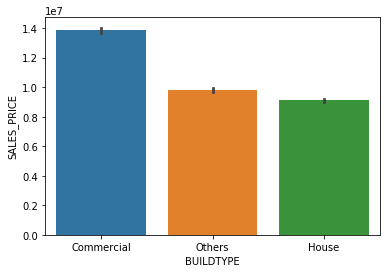

In [65]:
sns.barplot(x = df.BUILDTYPE, y = df.SALES_PRICE)

*Commercial houses are having a higher price point*

### UTILITY_AVAIL

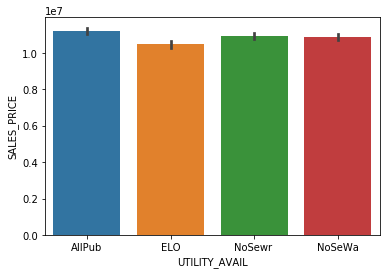

In [66]:
sns.barplot(x = df.UTILITY_AVAIL, y = df.SALES_PRICE)

*There's slight increase in sale price with utility*

### STREET

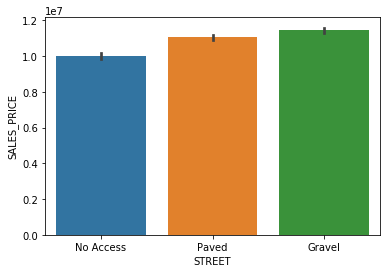

In [67]:
order2 = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x = df.STREET, y = df.SALES_PRICE,order=order2)

*Street is linearly related to sales price*

### MZZONE

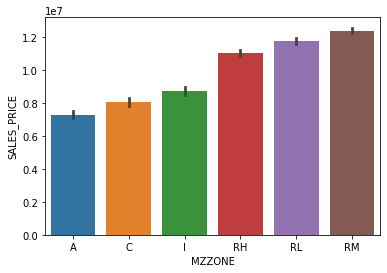

In [68]:
order3 = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x = df.MZZONE, y = df.SALES_PRICE,order=order3)

*RM Zone seems to be having the highest selling price and zone is linearly related*

### QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL

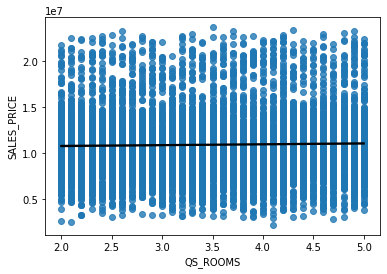

In [69]:
sns.regplot(x=df.QS_ROOMS, y=df.SALES_PRICE, line_kws={"color": "black"})

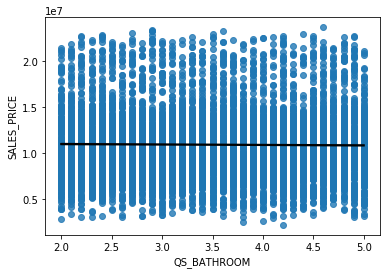

In [70]:
sns.regplot(x=df.QS_BATHROOM, y=df.SALES_PRICE, line_kws={"color": "black"})

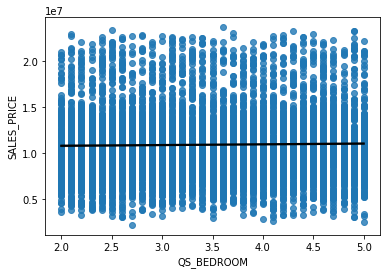

In [71]:
sns.regplot(x=df.QS_BEDROOM, y=df.SALES_PRICE, line_kws={"color": "black"})

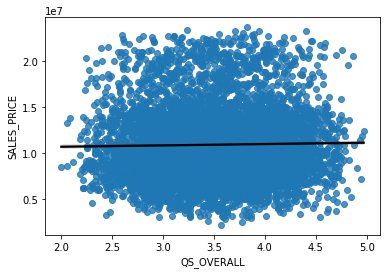

In [72]:
sns.regplot(x=df.QS_OVERALL, y=df.SALES_PRICE, line_kws={"color": "black"})

*All the above features aren't showing any relationship with the sales price*

### HOUSE_AGE

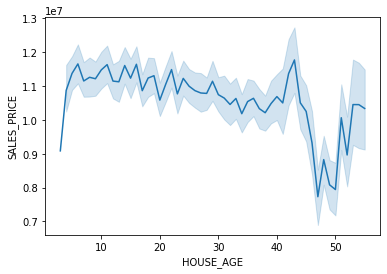

In [73]:
sns.lineplot(x=df.HOUSE_AGE, y=df.SALES_PRICE)

*Sales price tends to decrease with age of the house*

## Model building 

#### Dropping  features that are not strongly related to sales price

In [74]:
df.drop(['QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','DIST_MAINROAD','UTILITY_AVAIL'],axis=1,inplace=True)

#### Performing label encoding for categorical features

In [75]:
df['AREA'] = df['AREA'].map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar': 5, 'T Nagar':6})
df['STREET'] = df['STREET'].map({'No Access':0, 'Paved':1, 'Gravel':2 })
df['MZZONE'] = df['MZZONE'].map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1, 'No':0})
df['SALE_COND'] = df['SALE_COND'].map({'Partial':0, 'Family':1, 'AbNormal':2, 'Normal Sale':3, 'AdjLand':4})

#### Using one hot encoding for BUILDTYPE 

In [76]:
df = pd.get_dummies(df, columns = ['BUILDTYPE'])

In [78]:
X=df[df.columns[:-1]].values
Y=df['SALES_PRICE'].values

#### Splitting dataset into train and test where I've considered 25% of data for testing 

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Linear Regression 

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_st, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_predLR = regressor.predict(X_test_st)

In [145]:
from sklearn import metrics 
print('R2 SCORE for Linear Regression:', metrics.r2_score(y_test,y_predLR))

R2 SCORE for Linear Regression: 1.0


*We got R2 Score=1. That's something uncommon and the features we have considered must be accurate for prediction*

### K-NN

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50,100]:
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train_st, y_train)
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_st, y_train, cv=10)))

K value  :  1  score :  0.9577947161183422
K value  :  2  score :  0.9666002833961553
K value  :  3  score :  0.9690367097466044
K value  :  4  score :  0.9699950555110288
K value  :  5  score :  0.9699267349032569
K value  :  6  score :  0.9694843603248893
K value  :  7  score :  0.9688920123256619
K value  :  8  score :  0.968703903051856
K value  :  9  score :  0.9681829997193582
K value  :  10  score :  0.9678810438424691
K value  :  20  score :  0.964989563703629
K value  :  50  score :  0.9563054234191617
K value  :  100  score :  0.9451279640423731


#### Considering K value = 4  

In [146]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_st, y_train)
y_predknn = knn.predict(X_test_st)
print('R2 SCORE for KNN:', metrics.r2_score(y_test,y_predknn))

R2 SCORE for KNN: 0.9716652731850315


### Decision Tree 

In [147]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_st, y_train)
y_pred_dt = dt.predict(X_test_st)
print('R2 SCORE for Decision Tree algorithm:', metrics.r2_score(y_test,y_pred_dt))

R2 SCORE for Decision Tree algorithm: 0.9999901085256838


*Quite a good score*

### Random Forest 

In [148]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators= 100, max_depth = 25, max_features='sqrt')
RF.fit(X_train_st, y_train);
y_pred_RF = RF.predict(X_test_st)
print('R2 SCORE for Random Forest algorithm with max_depth of 25:', metrics.r2_score(y_test,y_pred_RF))

R2 SCORE for Random Forest algorithm with max_depth of 25: 0.9982415501021161


### XGBoost 

In [111]:
import xgboost as xg
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  model = xg.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_st, y_train)
  model.score(X_train_st, y_train)
  print("Learning rate : ", lr, " Training score : ", model.score(X_train_st, y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_st, y_train, cv=10)))

Learning rate :  0.01  Training score :  -0.26081409668272126  Cross-Val score :  -0.2652571575643753
Learning rate :  0.02  Training score :  0.8328139878332026  Cross-Val score :  0.8321272028571783
Learning rate :  0.03  Training score :  0.978240379543873  Cross-Val score :  0.9780985146664442
Learning rate :  0.04  Training score :  0.9972136177437155  Cross-Val score :  0.9971839299774331
Learning rate :  0.05  Training score :  0.9996426381685595  Cross-Val score :  0.9996302084588213
Learning rate :  0.06  Training score :  0.999947617692861  Cross-Val score :  0.9999353498563641
Learning rate :  0.07  Training score :  0.9999836050171778  Cross-Val score :  0.9999719688653969
Learning rate :  0.08  Training score :  0.9999870593478352  Cross-Val score :  0.999974673985162
Learning rate :  0.09  Training score :  0.9999859790825866  Cross-Val score :  0.9999719984407314
Learning rate :  0.1  Training score :  0.9999850841060375  Cross-Val score :  0.9999679845360754
Learning ra

###  From the above results, we have Linear Regression with 100%, Decision Tree &  XG-Boost with 99% accuracy

## Feature Importance

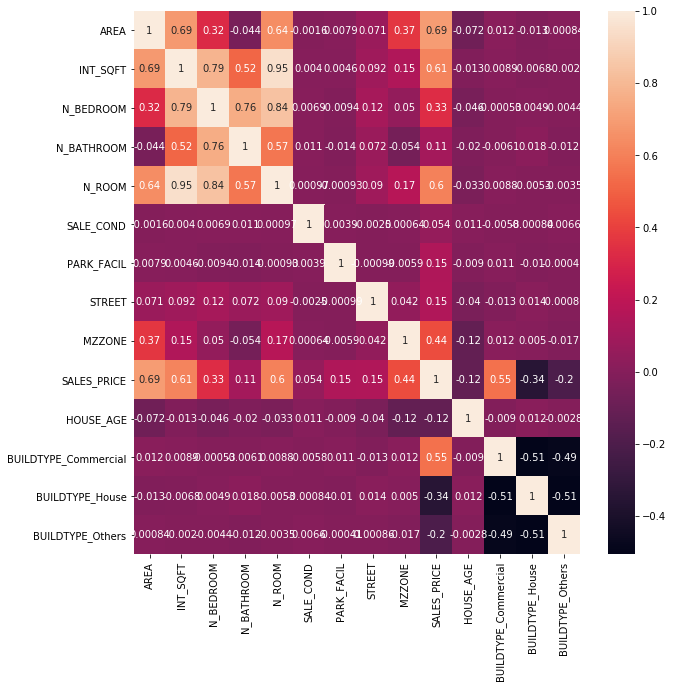

In [116]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [149]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE             1.000000
AREA                    0.694149
INT_SQFT                0.612125
N_ROOM                  0.602760
BUILDTYPE_Commercial    0.551058
MZZONE                  0.436594
N_BEDROOM               0.330987
STREET                  0.149589
PARK_FACIL              0.146428
N_BATHROOM              0.108834
SALE_COND               0.054370
HOUSE_AGE              -0.118842
BUILDTYPE_Others       -0.201783
BUILDTYPE_House        -0.344982
Name: SALES_PRICE, dtype: float64

### Features majorly contributing to the price have been listed below according to their priority


- Area of the house plays a major role in defining the price.
- Square feet or the dimensions of the house stand second in the list.
- Number of rooms in an house.
- Buildtype of the house and commercial buildtype is topping the list of buildtypes.
- The Zone where the house is resided &
- Number of bedrooms play a vital role in defining the price of the house.
- Street and Parking facility are also contributing but not majorly. Considering them wouldn't plant any problems.



The above observations are beneficial for both customers and sellers as customers can consider the above features before negotiating and sellers can focus on the features that'll help fill their pockets **:)**